Enter topic: buddha
Gautama Buddha (c. 563 BCE/480 BCE – c. 483 BCE/400 BCE), also known as Siddhārtha Gautama, Shakyamuni Buddha, or simply the Buddha, after the title of Buddha, was an ascetic (śramaṇa) and sage, on whose teachings Buddhism was founded. He is believed to have lived and taught mostly in the eastern part of ancient India sometime between the sixth and fourth centuries BCE.
Gautama taught a Middle Way between sensual indulgence and the severe asceticism found in the śramaṇa movement common in his region. He later taught throughout other regions of eastern India such as Magadha and Kosala.
Gautama is the primary figure in Buddhism. He is recognized by Buddhists as an enlightened or divine teacher who attained full Buddhahood, and shared his insights to help sentient beings end rebirth and suffering. Accounts of his life, discourses, and monastic rules are believed by Buddhists to have been summarized after his death and memorized by his followers. Various collections of 

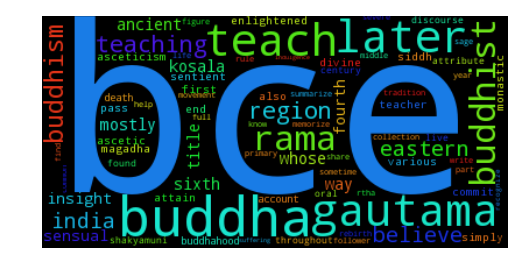

In [4]:
import wikipedia,nltk,re,math
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def preprocess_Text():
    # Collect text input from wikipedia
    sampleText = input("Enter topic: ")
    sampleText = wikipedia.summary(sampleText)
    print(sampleText)

    # Preprocess the text
    # Step 1: Tokenisation
    tokens = nltk.word_tokenize(sampleText)
#     print("\n*****************TOKENS********************\n")
#     print(tokens)

    # Step 2: Normalisation
    tokens = [w.lower() for w in tokens]
#     print("\n***************************   NORMALIZED TOKENS   ********************************\n")
#     print(tokens)

    # POS tag normalized tokens and check inaccuracies
    tokens = nltk.pos_tag(tokens)
#     print("\n******************   POS TAG NORMALIZED TOKENS   ************************\n") 
#     print(tokens)

    def lemmatize_all():
        wn = nltk.WordNetLemmatizer()
        for word, tag in tokens:
            if tag.startswith("NN"):
                yield wn.lemmatize(word, pos='n')
            elif tag.startswith('VB'):
                yield wn.lemmatize(word, pos='v')
            elif tag.startswith('JJ'):
                yield wn.lemmatize(word, pos='a')
            else:
                yield word

    print("\n***************** LEMMATIZATION ********************\n")
    lemmatised_output = ' '.join(lemmatize_all())
#     print(lemmatised_output)
    

    # Remove punctuations and stopwords
    cachedStopWords = stopwords.words("english")
    lemmatised_output = ' '.join([word for word in lemmatised_output.split() if word not in cachedStopWords])
    return(' '.join(re.findall(r'\w+', lemmatised_output, flags = re.UNICODE | re.LOCALE)))
 

def generateWordCloud(lemmatisedWords):
    wordcloud = WordCloud().generate(lemmatisedWords)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
generateWordCloud(preprocess_Text())

